In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from data.transform import OneHotTransform, NumericTransform

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [6]:
data.describe()

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,4.149114e+00,1.337572e-02,4.749410e+00,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,2.394259e+00,1.148774e-01,1.111927e+00,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,2.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,4.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+01,1.000000e+00,9.000000e+00,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

## 檢查空值 (flbmk:Fallback 註記 , flg_3dsmk:3DS:交易註記　有空值)

In [8]:
stat = data.isna().sum(0)/len(data)
res = stat[stat > 0]
res

flbmk        0.008267
flg_3dsmk    0.008267
dtype: float64

### 空值中 有盜刷案例，故不刪除，將空值當成第三類別

In [9]:
data[data.flbmk.isna()].fraud_ind.value_counts(), data[data.flg_3dsmk.isna()].fraud_ind.value_counts()

(0    12386
 1      195
 Name: fraud_ind, dtype: int64,
 0    12386
 1      195
 Name: fraud_ind, dtype: int64)

In [10]:
nonnull_data = data.copy()
nonnull_data.flbmk = data.flbmk.fillna('UNKNOWN')
nonnull_data.flg_3dsmk = data.flg_3dsmk.fillna('UNKNOWN')
nonnull_data.shape, data.shape

((1521787, 23), (1521787, 23))

In [11]:
X_data = nonnull_data.drop('fraud_ind', 1)
y_data = nonnull_data["fraud_ind"]
X_data.shape, y_data.shape

((1521787, 22), (1521787,))

## Label(y) Data

   fraud_ind
0   0.986624
1   0.013376


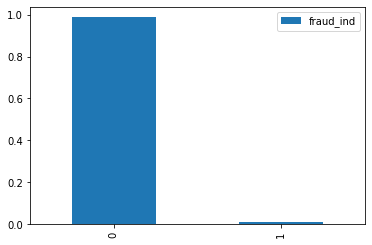

In [12]:
value_count = pd.DataFrame(y_data.value_counts(normalize=True))
print(value_count)
print('=' * 20)
value_count.plot.bar()

In [13]:
y_data.value_counts()

0    1501432
1      20355
Name: fraud_ind, dtype: int64

# EDA & 特徵處理

## 類別型變數
   * contp 交易類別 -> one hot
   * etymd 交易型態  -> onh hot
   * ecfg 網路交易註記 -> one hot
   * insfg 分期交易註記 -> one hot
   * stocn 消費地國別 -> hash ->one hot
   * scity 消費城市  -> hash -> one hot
   * stscd 狀態碼 ->  one hot 
   * ovrlt 超額註記碼  -> one hot
   * flbmk Fallback 註記 -> one hot
   * hcefg 支付形態 -> one hot
   * csmcu 消費地幣別 -> one hot
   * flg_3dsmk 3DS 交易註記 -> one hot

In [14]:
nonnull_data[["contp", "etymd", "ecfg", "insfg", "stocn", "scity", "stscd", "ovrlt", "flbmk", "hcefg", "csmcu", "flg_3dsmk"]].nunique() 

contp           7
etymd          11
ecfg            2
insfg           2
stocn         103
scity        5698
stscd           5
ovrlt           2
flbmk           3
hcefg           9
csmcu          72
flg_3dsmk       3
dtype: int64

In [15]:
nonnull_data[["contp", "etymd", "ecfg", "insfg", "stocn", "scity", "stscd", "ovrlt", "flbmk", "hcefg", "csmcu", "flg_3dsmk"]].head()

,contp,etymd,ecfg,insfg,stocn,scity,stscd,ovrlt,flbmk,hcefg,csmcu,flg_3dsmk
0,5,0,N,N,102,0,0,N,N,5,0,N
1,5,2,N,N,102,5817,0,N,N,0,0,N
2,5,0,N,N,102,0,0,N,N,5,0,N
3,5,5,N,N,102,3281,0,N,N,5,62,N
4,5,4,N,N,102,5817,0,N,N,5,62,N


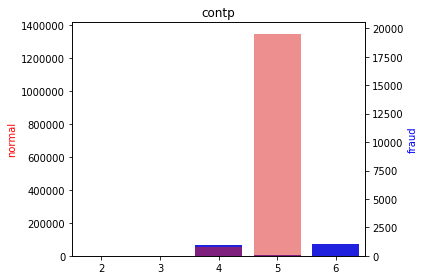

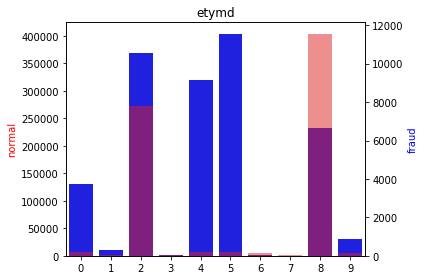

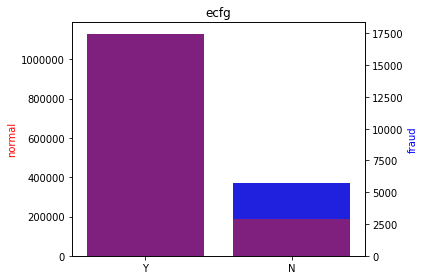

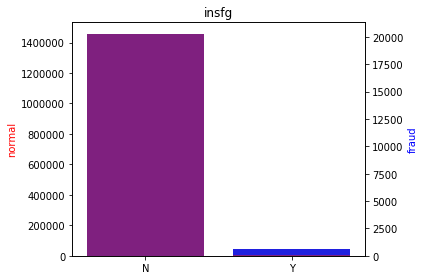

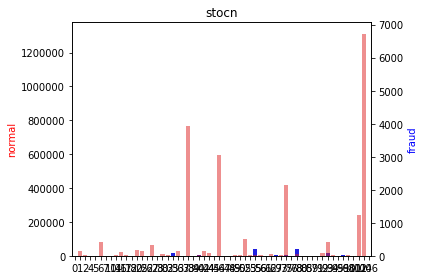

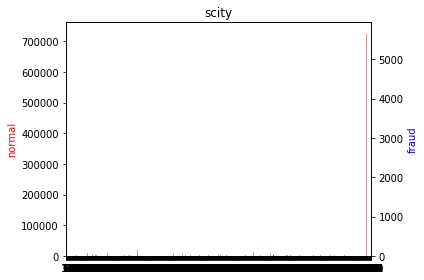

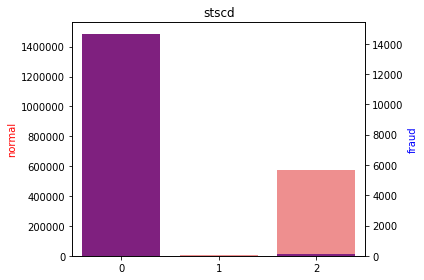

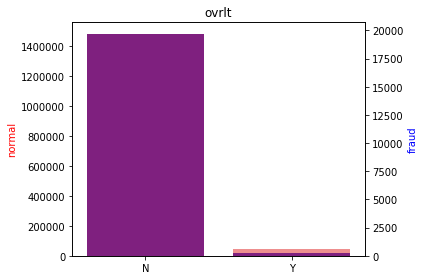

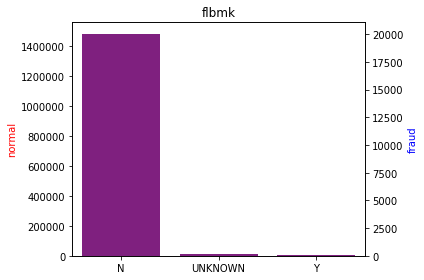

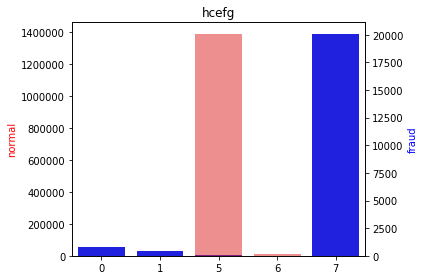

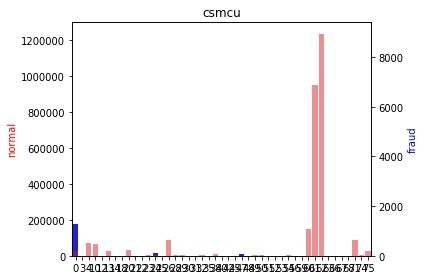

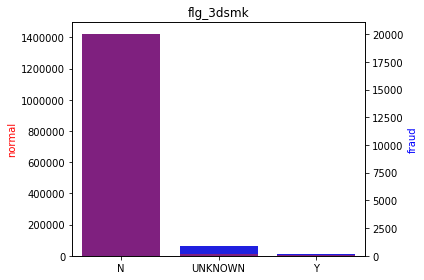

In [16]:
eda_cat_fea = ["contp", "etymd", "ecfg", "insfg", "stocn", "scity", "stscd", "ovrlt", "flbmk", "hcefg", "csmcu", "flg_3dsmk"]
for f in eda_cat_fea:

    norm_data = nonnull_data[nonnull_data["fraud_ind"] == 0][f].value_counts()
    fraud_data = nonnull_data[nonnull_data["fraud_ind"] == 1][f].value_counts()

    
    
    fig, ax = plt.subplots()
    plt.title(f'{f}')
    sns.barplot(x=norm_data.index, y=norm_data.values, color='b', ax=ax)
    ax.set_ylabel('normal', color = 'r')

    ax2 = ax.twinx()
    sns.barplot(x=fraud_data.index, y=fraud_data.values, color='r', ax=ax2, alpha=0.5)
    ax2.set_ylabel('fraud', color = 'b')

    plt.tight_layout()
    plt.show()

## ID(身分)、代碼或交易序號型變數
   * bacno 歸戶帳號 --> hash
   * txkey 交易序號-->hash
   * cano 交易卡號 -->  hash
   * mchno 特店代號 -->  hash
   * acqic 收單行代碼 --> hash
   * mcc MCC_CODE -->  hash

In [17]:
MOD_HASH_ONE_HOT_FEATURE = ["bacno", "txkey", "cano", "mchno", "acqic", "mcc"]

In [18]:
nonnull_data[MOD_HASH_ONE_HOT_FEATURE].nunique() 

bacno      95214
txkey    1521787
cano      129413
mchno      89316
acqic       6051
mcc          434
dtype: int64

# One Hot Transform

In [19]:
ONE_HOT_FEATURE = ["contp", "etymd", "ecfg", "insfg", "stscd", "ovrlt", "flbmk", "hcefg", "flg_3dsmk", "csmcu"]
MOD_HASH_ONE_HOT_FEATURE = ["scity", "stocn", "bacno", "txkey", "cano", "mchno", "acqic", "mcc"]

In [28]:
# one_hot_train_data = OneHotTransform(nonnull_data[ONE_HOT_FEATURE + MOD_HASH_ONE_HOT_FEATURE], 
#                                      save_enc=True,
#                                      mod_hash_feature=MOD_HASH_ONE_HOT_FEATURE).transform()
one_hot_train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

## 數值型變數
   * locdt 授權日期
   * loctm 授權時間
   * conam 交易金額-台幣(經過轉換)
   * iterm 分期期數

### Numeric Data Transform

In [29]:
numeric_data = nonnull_data[["locdt", "loctm", "conam", "iterm"]]
numeric_data = NumericTransform(numeric_data, want_scalar=False, save_scaler=False).transform()

In [30]:
numeric_data.head()

,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss
0,33,172652.0,513.80,0,17,26,52
1,9,105114.0,465.62,0,10,51,14
2,6,152458.0,513.80,0,15,24,58
3,5,172946.0,1016.11,0,17,29,46
4,6,182129.0,713.66,0,18,21,29


## 盜刷與正常交易的金額狀況


In [31]:
numeric_data_with_label =  pd.concat([numeric_data, nonnull_data.fraud_ind], 1)


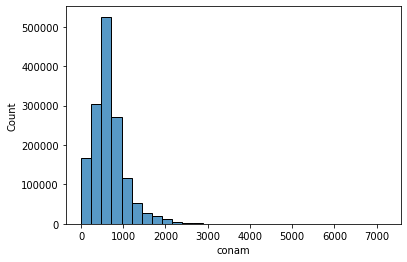

In [32]:
sns.histplot(numeric_data_with_label[numeric_data_with_label.fraud_ind == 0].conam, bins=30 )

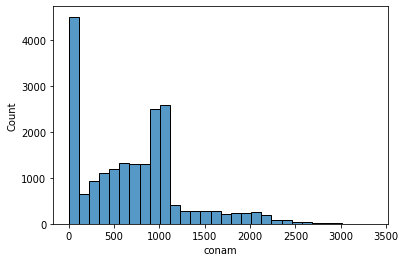

In [33]:
sns.histplot(numeric_data_with_label[numeric_data_with_label.fraud_ind == 1].conam, bins=30 )

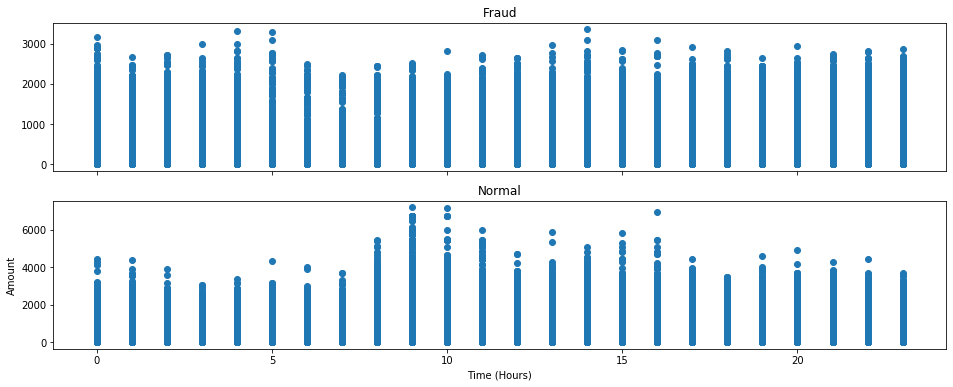

In [26]:
#盜刷交易、交易金額和交易時間的關係
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))

ax1.scatter(numeric_data_with_label[numeric_data_with_label.fraud_ind == 1].loctm_hh, numeric_data_with_label[numeric_data_with_label.fraud_ind == 1].conam)
ax1.set_title('Fraud')

ax2.scatter(numeric_data_with_label[numeric_data_with_label.fraud_ind == 0].loctm_hh, numeric_data_with_label[numeric_data_with_label.fraud_ind == 0].conam)
ax2.set_title('Normal')

plt.xlabel('Time (Hours)')
plt.ylabel('Amount')
plt.show()

# Split Train ans Test

## Combine the all data

In [34]:
all_data = pd.concat([numeric_data, one_hot_train_data, y_data], 1)

In [35]:
train_split_point = 0.8


In [36]:
all_data.shape, data.shape

((1521787, 204), (1521787, 23))

In [37]:
train_data = all_data.iloc[: int(all_data.shape[0] * train_split_point) ]
test_data = all_data.iloc[int(all_data.shape[0] * train_split_point): ]

In [38]:
train_data.head()

,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,fraud_ind
0,33,172652.0,513.80,0,17,26,52,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,9,105114.0,465.62,0,10,51,14,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,152458.0,513.80,0,15,24,58,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,5,172946.0,1016.11,0,17,29,46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

In [39]:
train_data.shape, test_data.shape

((1217429, 204), (304358, 204))

### MinMax (只針對train 做MinMax，否則會data leakage)

In [41]:
train_data[numeric_data.columns].head()

,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss
0,33,172652.0,513.80,0,17,26,52
1,9,105114.0,465.62,0,10,51,14
2,6,152458.0,513.80,0,15,24,58
3,5,172946.0,1016.11,0,17,29,46
4,6,182129.0,713.66,0,18,21,29


In [42]:
numeric_data_minmax = NumericTransform(train_data[numeric_data.columns], want_scalar=True, save_scaler=True).transform()

In [43]:
numeric_data_minmax.shape

(1217429, 7)

In [44]:
train_data = pd.concat([train_data.drop(numeric_data.columns, 1), pd.DataFrame(numeric_data_minmax, columns=numeric_data.columns)], 1)

In [45]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,fraud_ind,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.359551,0.731703,0.071274,0.0,0.739130,0.440678,0.881356
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.089888,0.445476,0.064591,0.0,0.434783,0.864407,0.237288
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.056180,0.646121,0.071274,0.0,0.652174,0.406780,0.983051
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [46]:
X_train = train_data.drop("fraud_ind", 1)
y_train = train_data["fraud_ind"]
X_test = test_data.drop("fraud_ind", 1)
y_test = test_data["fraud_ind"]

In [47]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1217429, 203), (1217429,), (304358, 203), (304358,))

# SMOTE 

In [48]:
from collections import Counter
from imblearn.over_sampling import SMOTE
import numpy as np

In [49]:
print('Before resampled dataset shape %s' % Counter(y_train))
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Before resampled dataset shape Counter({0: 1201023, 1: 16406})
Resampled dataset shape Counter({0: 1201023, 1: 1201023})


In [50]:
X_train_smote, y_train_smote = np.array(X_train_smote), np.array(y_train_smote)


In [51]:
y_train_smote_one_hot = tf.keras.utils.to_categorical(y_train_smote)
y_train_smote_one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [52]:
y_test_one_hot = tf.keras.utils.to_categorical(y_test)
y_test_one_hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

# Train 

## Supervised  

In [5]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_128 = tf.keras.layers.Dense(128)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_8 = tf.keras.layers.Dense(8)
        self.dense_4 = tf.keras.layers.Dense(4)


    def call(self, inputs):
        x = self.dense_128(inputs)
        x = self.dense_64(x)
        x = self.dense_32(x)
        x = self.dense_8(x)
        x = self.dense_4(x)
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_8 = tf.keras.layers.Dense(8)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_128 = tf.keras.layers.Dense(128)

        
    def call(self, inputs):
        x = self.dense_8(inputs)
        x = self.dense_32(x)
        x = self.dense_64(x)
        x = self.dense_128(x)
        return x

In [6]:
class CredictFraudDetect(tf.keras.Model):
    def __init__(self):
        super().__init__()
        
        self.encoder = Encoder()
        self.decoder = Decoder()
        
        self.dense = tf.keras.layers.Dense(2, activation='softmax')
    def call(self, inp):
        x = self.encoder(inp)
        x = self.decoder(x)
        x = self.dense(x)
        
        return x

In [46]:
class OneHotEmbedding(tf.keras.layers.Layer):
    def __init__(self, input_dim):
        super().__init__()
        self.input_dim = int(input_dim)
        self.embedding = tf.keras.layers.Embedding(self.input_dim, int(self.input_dim / 2), name='embedding')
        self.flatten = tf.keras.layers.Flatten(name='flatten')
        self.dense_64 = tf.keras.layers.Dense(128, name='onehot_dense64')
        self.dense_32 = tf.keras.layers.Dense(64, name='onehot_dense32')

    @tf.function
    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.flatten(x)
        x = self.dense_64(x)
        x = self.dense_32(x)

        return x
    

In [47]:
class NN(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()
        self.dense_64 = tf.keras.layers.Dense(128, name='nn_dense64')
        self.dense_32 = tf.keras.layers.Dense(64, name='nn_dense32')

    @tf.function
    def call(self, inputs):
        x = self.dense_64(inputs)
        x = self.dense_32(x)

        return x

In [129]:

class MultiInputCredictFraudDetect(tf.keras.layers.Layer):
    def __init__(self, embedding_input_dim):
        super().__init__()
        self.embedding_input_dim = embedding_input_dim
        
        self.onehotembedding = OneHotEmbedding(embedding_input_dim)
        self.nn = NN()
        
        self.dense_8 = tf.keras.layers.Dense(8)
        self.dense = tf.keras.layers.Dense(2, activation='softmax')
    
    @tf.function
    def call(self,one_hot_inp, inp):
        x1 = self.onehotembedding(one_hot_inp)
        x2 = self.nn(inp)
        concat_x = tf.keras.layers.Concatenate()([x1, x2])
        out = self.dense_8(concat_x)

        out = self.dense(out)
        
        return out
    
    def get_config(self):

        config = super().get_config().copy()
        config.update({
            'embedding_input_dim': self.embedding_input_dim,
        
        })
        return config

In [37]:
X_train_smote.shape

(2402046, 203)

### 分為兩種輸入

In [50]:
# onehot_X_train_smote = X_train_smote[:, :196]
# onehot_X_train_smote.shape

(2402046, 196)

In [51]:
# nn_X_train_smote = X_train_smote[:, 196:]
# nn_X_train_smote.shape

(2402046, 7)

In [38]:
# loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

# i = tf.keras.layers.Input(shape=nn_X_train_smote[0].shape)
# onehot_i = tf.keras.layers.Input(shape=onehot_X_train_smote[0].shape)

# out =  MultiInputCredictFraudDetect(embedding_input_dim=onehot_X_train_smote[0].shape[-1])(one_hot_inp=onehot_i, inp=i)
# m = tf.keras.Model(inputs=[i, onehot_i], outputs=[out])
# m.compile(loss=loss,
#               optimizer=tf.keras.optimizers.Adam(),
#               metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(class_id=1)])

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

i = tf.keras.layers.Input(shape=X_train_smote[0].shape)

out =  CredictFraudDetect()(i)
m = tf.keras.Model(inputs=i, outputs=out)
m.compile(loss=loss,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall(class_id=1)])

2021-11-28 19:35:30.204014: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-11-28 19:35:30.255042: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-28 19:35:30.255763: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.70GiB deviceMemoryBandwidth: 871.81GiB/s
2021-11-28 19:35:30.255781: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2021-11-28 19:35:30.257039: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2021-11-28 19:35:30.257067: I tensorflow/stream_executor/platform/

In [41]:
reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1)

tb = tf.keras.callbacks.TensorBoard(log_dir='./storage/autosuperlogs_tb')


cp = tf.keras.callbacks.ModelCheckpoint(filepath='./storage/model/supervised/autochcekpoint',save_weights_only=True)

2021-11-28 19:36:14.160143: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-28 19:36:14.160160: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-28 19:36:14.270666: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-28 19:36:14.271534: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed


In [44]:
m.fit(X_train_smote,
      y_train_smote_one_hot, 
      batch_size=128, 
      epochs=50, 
      verbose=1,
      shuffle=True,
      validation_split=0.1, 
      callbacks=[reduce_lr, cp, tb])

Epoch 1/50


2021-11-28 19:37:45.143936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-28 19:37:45.161638: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2496000000 Hz
2021-11-28 19:37:45.611103: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


    2/16890 [..............................] - ETA: 42:05 - loss: 0.7262 - accuracy: 0.5703 - auc: 0.5075 - recall: 0.8000  

2021-11-28 19:37:45.948884: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2021-11-28 19:37:45.948924: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2021-11-28 19:37:45.965535: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-28 19:37:45.965554: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-28 19:37:46.103049: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 19:37:46.103498: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed
2021-11-28 19:37:46.119214: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 195 callback api events and 190 activity events. 
2021-11-28 19:37:46.121909: I tensorflow/core/profiler

16890/16890 [==============================] - 25s 1ms/step - loss: 0.2392 - accuracy: 0.9145 - auc: 0.9632 - recall: 0.9180 - val_loss: 0.2552 - val_accuracy: 0.9171 - val_auc: 0.9564 - val_recall: 0.9171
Epoch 2/50
16890/16890 [==============================] - 26s 2ms/step - loss: 0.2371 - accuracy: 0.9148 - auc: 0.9639 - recall: 0.9185 - val_loss: 0.2283 - val_accuracy: 0.9253 - val_auc: 0.9659 - val_recall: 0.9253
Epoch 3/50
16890/16890 [==============================] - 27s 2ms/step - loss: 0.2368 - accuracy: 0.9150 - auc: 0.9640 - recall: 0.9186 - val_loss: 0.2464 - val_accuracy: 0.9212 - val_auc: 0.9590 - val_recall: 0.9212
Epoch 4/50
16890/16890 [==============================] - 27s 2ms/step - loss: 0.2365 - accuracy: 0.9150 - auc: 0.9641 - recall: 0.9187 - val_loss: 0.2655 - val_accuracy: 0.9155 - val_auc: 0.9537 - val_recall: 0.9155
Epoch 5/50
16890/16890 [==============================] - 27s 2ms/step - loss: 0.2364 - accuracy: 0.9150 - auc: 0.9642 - recall: 0.9188 - val_l

In [12]:
import os
print(os.getcwd())

/Users/apple/Documents/履歷/網際威信/Interview coding/Credict


### Save

In [21]:


# m.save('./storage/model/supervised/autoencoder', save_format='tf')



'./storage/model /'

## LOAD MODEL

In [53]:
autoencoder= tf.keras.models.load_model('./storage/model/supervised/autoencoder/')


In [61]:
y_pred = autoencoder.predict(final_test_data)
y_pred

array([[0.88652885, 0.11347114],
       [0.99475175, 0.00524826],
       [0.5484841 , 0.45151594],
       ...,
       [0.9457413 , 0.0542587 ],
       [0.9435075 , 0.05649251],
       [0.99457365, 0.00542638]], dtype=float32)

In [77]:
y_pred[:,1]

array([0.11347114, 0.00524826, 0.45151594, ..., 0.0542587 , 0.05649251,
       0.00542638], dtype=float32)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(y_pred, -1)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95    300409
           1       0.12      0.92      0.21      3949

    accuracy                           0.91    304358
   macro avg       0.56      0.91      0.58    304358
weighted avg       0.99      0.91      0.94    304358



[0.         0.         0.         ... 0.98683129 0.98683794 1.        ] [0.00000000e+00 2.53228665e-04 1.01291466e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00] [1.9999522e+00 9.9995220e-01 9.9954349e-01 ... 1.0849870e-03 1.0849683e-03
 4.6962402e-08]


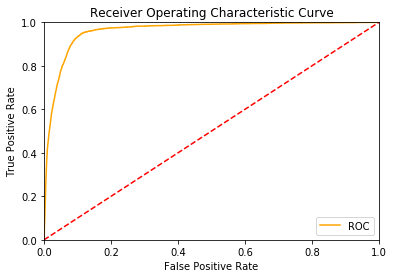

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score, auc


# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(y_test, y_pred[:,1])
print(fpr, tpr, threshold)

auc1 = auc(fpr, tpr)
## Plot the result
plt.title('Receiver Operating Characteristic Curve')

plt.plot(fpr, tpr, color = 'orange', label = 'ROC' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()    

In [79]:
auc1

0.9609661961652398

# Test

In [55]:
X_test.head(5)

,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195
1217429,21,102404.0,841.11,0,10,24,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1217430,1,181116.0,289.07,0,18,11,16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1217431,1,184537.0,415.46,0,18,45,37,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1217432,21,144026.0,103.48,0,14,40,26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [56]:
from sklearn.preprocessing import MinMaxScaler

one_hot_test = X_test[X_test.columns.drop(numeric_data.columns)].reset_index(drop=True)

In [57]:
numeric_test = NumericTransform(X_test[numeric_data.columns], want_scalar=True, save_scaler=False, scaler_path='./storage/scaler/MinMax.save').transform()

In [58]:
final_test_data = pd.concat([one_hot_test, numeric_test], 1)
final_test_data.shape

(304358, 203)

In [59]:
final_test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224719,0.433991,0.116679,0.0,0.434783,0.406780,0.067797
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.767574,0.040100,0.0,0.782609,0.186441,0.271186
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.782072,0.057633,0.0,0.782609,0.762712,0.627119
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [ ]:
# pred = m.predict([numeric_test, one_hot_test])
# pred

In [51]:
pred = m.predict(final_test_data)
pred

array([[0.88654673, 0.11345327],
       [0.9947495 , 0.00525048],
       [0.5484857 , 0.45151427],
       ...,
       [0.9458075 , 0.05419246],
       [0.94361126, 0.05638869],
       [0.9945964 , 0.00540365]], dtype=float32)

In [53]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from util import plot_confusion_matrix

In [ ]:
y_test_one_hot

In [55]:
m.evaluate(final_test_data, y_test_one_hot)


9512/9512 [==============================] - 11s 1ms/step - loss: 0.2228 - accuracy: 0.9112 - auc: 0.9706 - recall: 0.9154


[0.22283074259757996,
 0.9112459421157837,
 0.970646858215332,
 0.9154216051101685]

Confusion matrix, without normalization
[[273730  26679]
 [   334   3615]]


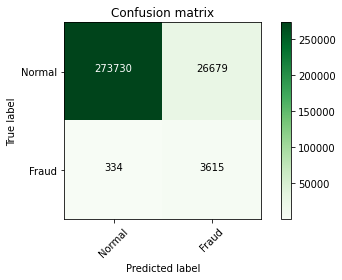

In [54]:
plot_confusion_matrix(confusion_matrix(y_test, np.argmax(pred, -1)), classes=['Normal', 'Fraud'])


## Unsupervised

In [58]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, first_layer_dim):
        super().__init__()
        self.dense_first_layer = tf.keras.layers.Dense(first_layer_dim)

        self.dense_128 = tf.keras.layers.Dense(128)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_8 = tf.keras.layers.Dense(8)

    @tf.function
    def call(self, inputs):
        x = self.dense_first_layer(inputs)
        x = self.dense_128(x)
        x = self.dense_64(x)
        x = self.dense_32(x)
        x = self.dense_8(x)
        return x
    
class Decoder(tf.keras.layers.Layer):
    def __init__(self, last_layer_dim):
        super().__init__()
        self.dense_32 = tf.keras.layers.Dense(32)
        self.dense_64 = tf.keras.layers.Dense(64)
        self.dense_128 = tf.keras.layers.Dense(128)
        self.dense_last_layer = tf.keras.layers.Dense(last_layer_dim)

    @tf.function 
    def call(self, inputs):
        x = self.dense_32(inputs)
        x = self.dense_64(x)
        x = self.dense_128(x)
        x = self.dense_last_layer(x)
        return x

In [59]:
class AutoEncoderDecoder(tf.keras.layers.Layer):
    def __init__(self, inp_dim):
        super().__init__()

        self.encoder = Encoder(inp_dim)
        self.decoder = Decoder(inp_dim)
    @tf.function    
    def call(self, inp):
        x = self.encoder(inp)
        x = self.decoder(x)
        return x

In [60]:

i = tf.keras.layers.Input(shape=X_train_smote[0].shape)
out = AutoEncoderDecoder(X_train_smote[0].shape[-1])(i)
model = tf.keras.Model(i, out)
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mse'])

In [61]:
reduce_lr =tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', verbose=1)

tb = tf.keras.callbacks.TensorBoard(log_dir='./storage/clusterlogs_tb')
 

cp = tf.keras.callbacks.ModelCheckpoint(filepath='./storage/model/supervised/chcekpoint', save_weights_only=True)

2021-11-28 18:08:00.882113: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-28 18:08:00.882129: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-28 18:08:00.969363: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-28 18:08:00.970328: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed


In [62]:
model.fit(X_train_smote, 
          X_train_smote, 
          batch_size=128, 
          epochs=30, 
          verbose=1,
          shuffle=True,
          validation_split=0.1,
          callbacks=[reduce_lr, tb, cp])

Epoch 1/30
    3/16890 [..............................] - ETA: 25:49 - loss: 0.1371 - mse: 0.1371

2021-11-28 18:08:04.490290: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session initializing.
2021-11-28 18:08:04.490316: I tensorflow/core/profiler/lib/profiler_session.cc:141] Profiler session started.
2021-11-28 18:08:04.633707: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-28 18:08:04.634216: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1743] CUPTI activity buffer flushed
2021-11-28 18:08:04.649766: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 117 callback api events and 114 activity events. 
2021-11-28 18:08:04.651659: I tensorflow/core/profiler/lib/profiler_session.cc:159] Profiler session tear down.
2021-11-28 18:08:04.653718: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: ./storage/clusterlogs_tb/train/plugins/profile/2021_11_28_18_08_04
2021-11-28 18:08:04.655149: I tensorflow/core/profiler/rpc/client/save_profile.cc:143

16890/16890 [==============================] - 19s 1ms/step - loss: 0.0289 - mse: 0.0289 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 2/30
16890/16890 [==============================] - 18s 1ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 3/30
16890/16890 [==============================] - 18s 1ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 4/30
16890/16890 [==============================] - 18s 1ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 5/30
16890/16890 [==============================] - 19s 1ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 6/30
16890/16890 [==============================] - 19s 1ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 7/30
16890/16890 [==============================] - 19s 1ms/step - loss: 0.0287 - mse: 0.0287 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 8/30
16890/16890 [============================

In [67]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 203)]             0         
_________________________________________________________________
auto_encoder_decoder (AutoEn (None, 203)               115031    
Total params: 115,031
Trainable params: 115,031
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.save('./storage/model/unsupervised/autoencoder', save_format='tf')


2021-11-28 18:17:26.483170: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./storage/model/unsupervised/autoencoder/assets


INFO:tensorflow:Assets written to: ./storage/model/unsupervised/autoencoder/assets


In [75]:
y_train

0          0
1          0
2          0
3          0
4          0
          ..
1217424    0
1217425    0
1217426    0
1217427    0
1217428    0
Name: fraud_ind, Length: 1217429, dtype: int64

# 比較原始data跟預測訓練資料的data PCA 圖

In [65]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## 原始 Data

In [66]:
pca=PCA(n_components=3)
pca_X_train = pca.fit_transform(X_train)

/home/steven/anaconda3/envs/bert/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [87]:
y_train.value_counts()

0    1201023
1      16406
Name: fraud_ind, dtype: int64

In [88]:

plot_3d(pca_X_train, y_train)

NameError: name 'plot_3d' is not defined

## Predict Data 

In [ ]:
clus_pred = model.predict(X_train)
clus_pred


In [ ]:
X_train.shape, clus_pred.shape

In [ ]:
pca=PCA(n_components=3)
pca_clus_pred = pca.fit_transform(clus_pred)

In [ ]:
pca_clus_pred.shape

In [ ]:
pca_X_train

In [ ]:
plot_3d(pca_clus_pred, y_train)

# Predict on Test Data

In [73]:
final_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,locdt,loctm,conam,iterm,loctm_hh,loctm_mm,loctm_ss
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.224719,0.433991,0.116679,0.0,0.434783,0.406780,0.067797
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.767574,0.040100,0.0,0.782609,0.186441,0.271186
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.782072,0.057633,0.0,0.782609,0.762712,0.627119
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

In [74]:
clus_pred_test = model.predict(final_test_data)
clus_pred_test


array([[ 1.2370700e-05,  2.6253110e-06,  1.4574941e-01, ...,
         5.5033624e-01,  4.8863858e-01,  5.0587046e-01],
       [-2.4191104e-06,  1.9848492e-05,  8.6965464e-02, ...,
         6.6215479e-01,  4.7914758e-01,  5.0195217e-01],
       [ 2.7526403e-07,  2.5121408e-05, -4.1644637e-02, ...,
         5.2235156e-01,  4.9197400e-01,  4.8835617e-01],
       ...,
       [-6.0521998e-06, -9.8477612e-05,  4.3058097e-02, ...,
         5.3991592e-01,  4.9669552e-01,  5.0146508e-01],
       [-1.0045944e-05, -6.4079693e-05,  1.1205861e-01, ...,
         4.9142161e-01,  4.8118305e-01,  5.0268114e-01],
       [ 6.1445520e-05,  8.5565873e-05, -1.9605920e-02, ...,
         7.3459661e-01,  5.0823081e-01,  4.9988315e-01]], dtype=float32)

In [129]:
clus_pred_test.shape, np.array(final_test_data).shape

((304358, 203), (304358, 203))

In [82]:
mse_test = np.mean(np.power(np.array(final_test_data) - clus_pred_test, 2), axis=1)


# 兩倍標準差以外的 當異常值

In [83]:
mean, std = np.mean(mse_test), np.std(mse_test)
mean, std

(0.03222247610692616, 0.009401960904499723)

In [103]:
up_outlier, down_outlier = mean + 2*std, mean - 2*std
up_outlier, down_outlier

(0.05102639791592561, 0.013418554297926717)

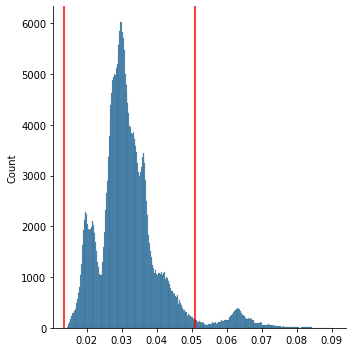

In [104]:
g = sns.displot(mse_test)
plt.axvline(up_outlier, 0, 6000, color='r')
plt.axvline(down_outlier, 0,6000, color='r')

# g.axhline(up_outlier)
# g.axhline(down_outlier)
plt.show()

In [105]:
mse_df = pd.DataFrame(mse_test, columns=['MSE'])
mse_df["is_up_out"] = np.where(mse_df.MSE > up_outlier, 1, 0)
mse_df["is_down_out"] = np.where(mse_df.MSE < down_outlier, 1, 0)
mse_df["is_fraud"] = mse_df.is_up_out + mse_df.is_down_out
mse_df

,MSE,is_up_out,is_down_out,is_fraud
0,0.031197,0,0,0
1,0.043047,0,0,0
2,0.031723,0,0,0
3,0.017310,0,0,0
4,0.033687,0,0,0
...,...,...,...,...
304353,0.066073,1,0,1
304354,0.065353,1,0,1
304355,0.063354,1,0,1
304356,0.065026,1,0,1


# Evaliation

In [106]:
mse_df['TrueLabel'] =  y_test.reset_index(drop=True)
mse_df.head()

,MSE,is_up_out,is_down_out,is_fraud,TrueLabel
0,0.031197,0,0,0,0
1,0.043047,0,0,0,0
2,0.031723,0,0,0,0
3,0.017310,0,0,0,0
4,0.033687,0,0,0,0


Confusion matrix, without normalization
[[287163  13246]
 [  3659    290]]


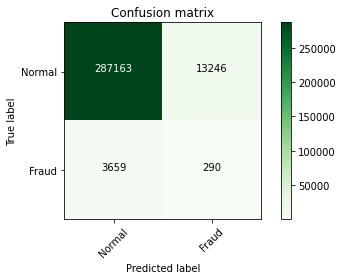

In [107]:
plot_confusion_matrix(confusion_matrix(y_test, mse_df.is_fraud), classes=['Normal', 'Fraud'])


In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mse_df.is_fraud))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97    300409
           1       0.02      0.07      0.03      3949

    accuracy                           0.94    304358
   macro avg       0.50      0.51      0.50    304358
weighted avg       0.97      0.94      0.96    304358



# Util Function

In [69]:
import math
def probility_of_hash_collision(k:int, bucket_size:int = 1000):
    p = 1 - math.exp((-k * (k - 1)) / (2 * bucket_size))
    return round(p, 3)
def calculate_bucket_size_on_specificy_probability(p:float, k):
    res = (-k * (k - 1)) / (2 * math.log2(1 - p))
    return res

    

In [89]:
def plot_3d(data, y):
    df = pd.DataFrame()
    df['label'] = y
    df ['f'] = data[:, 0]
    df ['s'] = data[:, 1]
    df ['t'] = data[:, 2]



    # 建立 3D 圖形
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    l1 = df[df.label == 1]
    l0 = df[df.label == 0]
    ax.scatter(l1['f'], l1.s, l1.t, cmap='Reds', marker='^', label='Fraud', alpha=0.5)
    ax.scatter(l0['f'], l0.s, l0.t, cmap='Blues', marker='o', label='Normal', alpha=0.1)

    ax.legend()

    plt.show()

In [91]:
probility_of_hash_collision(k=5698, bucket_size = 1000)


1.0

In [169]:
data[data.fraud_ind==1]

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
70,3288,88538,81033,1.38,5,62,Y,8,N,N,1,5,N,0,7,45457.0,337,20984,N,621,93,2,651056
349,6881,157859,82925,513.80,5,0,N,0,N,N,1,5,N,0,23,154137.0,457,59360,N,0,102,0,503429
1133,6769,34663,73355,677.88,5,62,Y,8,N,N,1,5,N,0,54,172810.0,373,79663,N,5817,102,0,259268
1208,6856,74183,18151,229.61,5,62,Y,8,N,N,1,5,N,0,32,112902.0,288,69240,N,0,104,0,1423892
1254,6881,125183,48320,513.80,5,0,N,0,N,N,1,5,N,0,67,45823.0,457,59360,N,0,102,0,554270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521552,6215,136379,138279,111.17,5,75,Y,2,NaN,NaN,1,6,N,0,16,172346.0,380,54238,N,6580,38,0,1849443
1521712,6215,136379,138279,111.17,5,75,Y,2,NaN,NaN,1,6,N,0,17,12250.0,380,54238,N,6580,38,0,1849997
1521718,6760,127255,129019,796.90,5,75,Y,2,NaN,NaN,1,6,N,0,5,182601.0,296,66694,N,3323,27,0,1837945
1521751,6215,96677,148700,1016.34,5,75,Y,2,NaN,NaN,1,6,N,0,28,203808.0,380,54238,N,6580,38,0,1862452
